In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

import warnings
import sklearn
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)
warnings.filterwarnings("ignore")

numpy 1.18.1
pandas 1.0.3
sklearn 0.23.1


# Introduction 

## Problem Statement 

## Data

# Obtain Data

## Load Data 

In [2]:
from sklearn import datasets
iris = datasets.load_iris(return_X_y=True, as_frame=True)

In [3]:
X = iris[0]
y = iris[1]

In [4]:
df = pd.concat([X, y], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Data Preprocessing

## Data Type 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## Missing Data

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Outliers

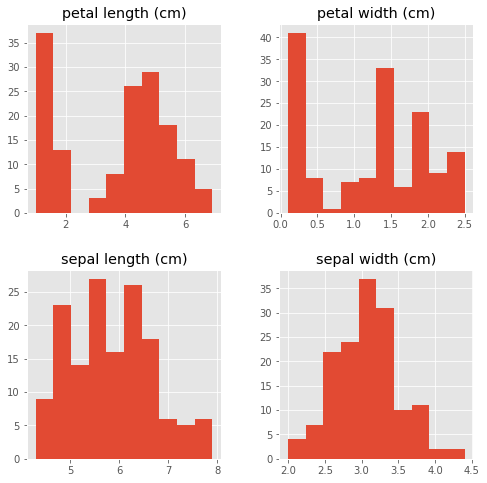

In [8]:
X.hist(figsize = (8,8))
plt.show()

This dataset appears to be clean because there is no wrong data type, missing data, or outlier.

## EDA 

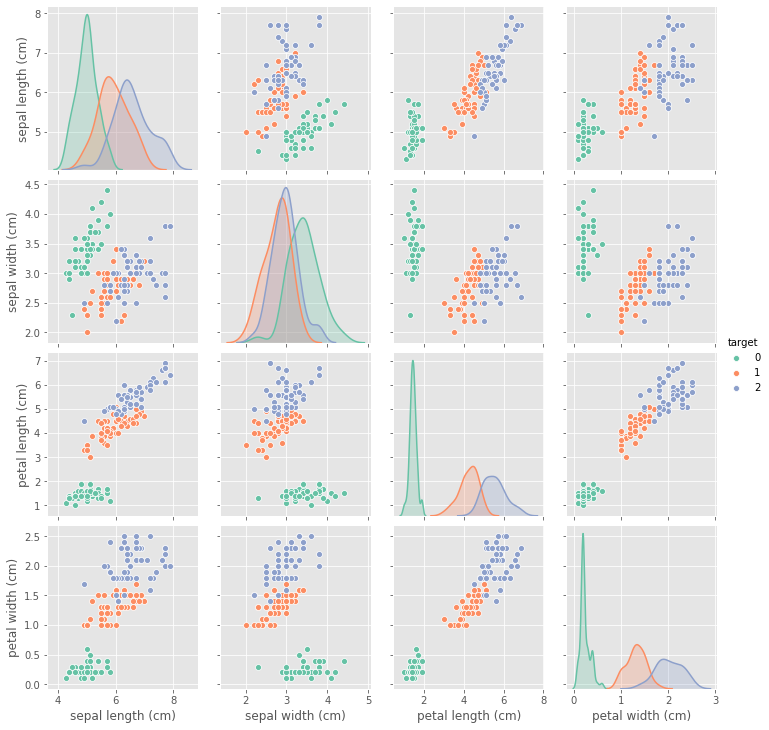

In [9]:
fig = sns.pairplot(df, hue="target", palette="Set2")
plt.show()

Insights:
* Target 0 is easily separable from the target 1 and 2.

# Data Transformation 

## Feature Scaling

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Model Training 

Assuming we do not have the target value, we are going to cluster the Iris dataset to predict its species using several methods.
1. Mini Batch K-Means Clustering
2. Hierarchial Clustering
3. PCA with 

After getting our result, we will compare it to a plot given by Dr. Fisher to see if our model has clustered the species correctly.

## Mini Batch K Means 

Let's first evaluate the optimum number of clusters by looking at the WCSS (within cluster sum of squares).

wcss 1: 681.3705999999996
wcss 2: 152.34795176035797
wcss 3: 78.851441426146
wcss 4: 57.25600931571815
wcss 5: 46.44618205128204
wcss 6: 39.03998724608725
wcss 7: 34.299712121212146
wcss 8: 30.014398496240617
wcss 9: 28.03690635345049
wcss 10: 26.534529220779234


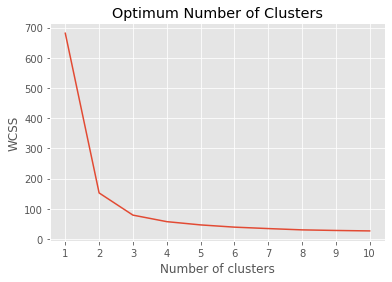

In [12]:
from sklearn.cluster import KMeans
wcss = []
# WCSS = inertia_ = Within Cluster Sum of Squares
# = squared average distance of all the points within a cluster to the cluster centroid

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print("wcss {}: {}".format(i, kmeans.inertia_))

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Optimum Number of Clusters')
plt.xticks(np.arange(1, 11, step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters in this case is betwen 2 and 3. Let's try both!

In [24]:
from sklearn.cluster import MiniBatchKMeans

km2 = MiniBatchKMeans(n_clusters = 2, random_state = 16, batch_size=6)
km2.fit(X)
km2_y_pred = km2.predict(X)

In [25]:
from sklearn.cluster import MiniBatchKMeans

km3 = MiniBatchKMeans(n_clusters = 3, random_state = 16, batch_size=6)
km3.fit(X)
km3_y_pred = km3.predict(X)

In [26]:
km2_result = pd.concat([X, y, pd.DataFrame(km2_y_pred, columns=["y_pred_km2"])], axis = 1)
km2_result.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_pred_km2
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [27]:
km_result = pd.concat([km2_result, 
                       pd.DataFrame(km3_y_pred, columns=["y_pred_km3"])
                      ], axis = 1)
km_result.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_pred_km2,y_pred_km3
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1


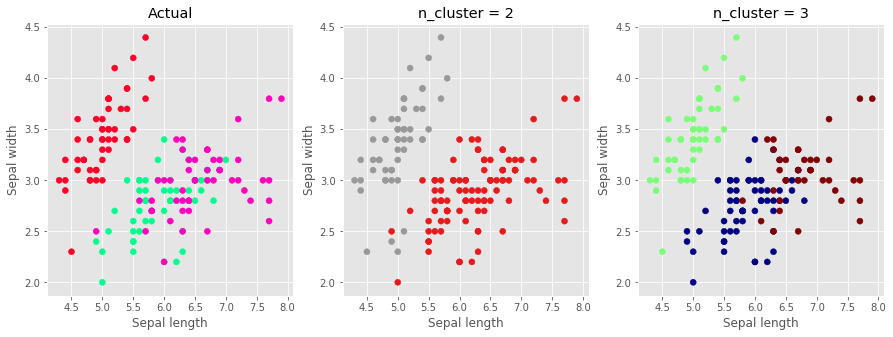

In [28]:
(fig, ax) = plt.subplots(1, 3, figsize=(15,5))
ax[0].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["target"], cmap='gist_rainbow')
ax[1].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["y_pred_km2"], cmap='Set1')
ax[2].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["y_pred_km3"], cmap='jet')


ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Sepal width')
ax[2].set_xlabel('Sepal length')
ax[2].set_ylabel('Sepal width')

ax[0].set_title('Actual')
ax[1].set_title('n_cluster = 2')
ax[2].set_title('n_cluster = 3')

plt.show()

## PCA + KMeans

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
pc = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])

In [50]:
df = pd.concat([pc, y], axis = 1)
df.head()

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


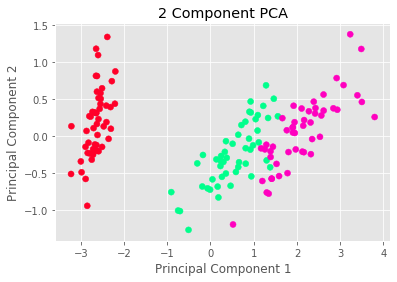

In [57]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df["target"], cmap='gist_rainbow')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.show()

wcss 1: 666.1659556405618
wcss 2: 137.1553011281842
wcss 3: 63.819942022001285
wcss 4: 42.206933915694485
wcss 5: 33.48209686079177
wcss 6: 26.127731751620622
wcss 7: 22.032950899392226
wcss 8: 17.924781489430277
wcss 9: 15.770109504558611
wcss 10: 13.850839339067731


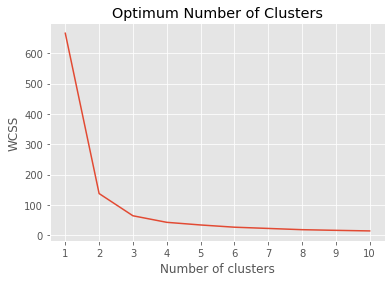

In [66]:
from sklearn.cluster import KMeans
wcss = []
# WCSS = inertia_ = Within Cluster Sum of Squares
# = squared average distance of all the points within a cluster to the cluster centroid

df = df.drop(columns=['target'])

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print("wcss {}: {}".format(i, kmeans.inertia_))

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Optimum Number of Clusters')
plt.xticks(np.arange(1, 11, step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters in this case is betwen 2 and 3. Let's try both!

In [67]:
from sklearn.cluster import MiniBatchKMeans

km2 = MiniBatchKMeans(n_clusters = 2, random_state = 16, batch_size=6)
km2.fit(df)
km2_y_pred = km2.predict(df)

In [68]:
from sklearn.cluster import MiniBatchKMeans

km3 = MiniBatchKMeans(n_clusters = 3, random_state = 16, batch_size=6)
km3.fit(df)
km3_y_pred = km3.predict(df)

In [69]:
km2_result = pd.concat([df, y, pd.DataFrame(km2_y_pred, columns=["y_pred_km2"])], axis = 1)
km2_result.head()

,PC1,PC2,target,y_pred_km2
0,-2.684126,0.319397,0,1
1,-2.714142,-0.177001,0,1
2,-2.888991,-0.144949,0,1
3,-2.745343,-0.318299,0,1
4,-2.728717,0.326755,0,1


In [70]:
km_result = pd.concat([km2_result, 
                       pd.DataFrame(km3_y_pred, columns=["y_pred_km3"])
                      ], axis = 1)
km_result.head()

,PC1,PC2,target,y_pred_km2,y_pred_km3
0,-2.684126,0.319397,0,1,1
1,-2.714142,-0.177001,0,1,1
2,-2.888991,-0.144949,0,1,1
3,-2.745343,-0.318299,0,1,1
4,-2.728717,0.326755,0,1,1


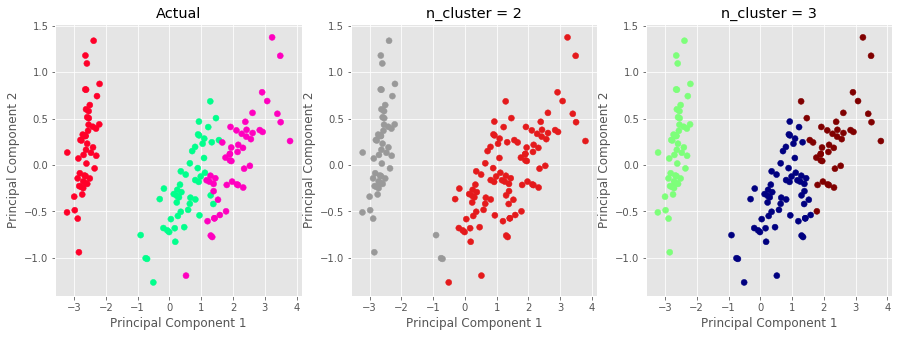

In [72]:
(fig, ax) = plt.subplots(1, 3, figsize=(15,5))
ax[0].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["target"], cmap='gist_rainbow')
ax[1].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["y_pred_km2"], cmap='Set1')
ax[2].scatter(km_result.iloc[:, 0], km_result.iloc[:, 1], c=km_result["y_pred_km3"], cmap='jet')


ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[2].set_xlabel('Principal Component 1')
ax[2].set_ylabel('Principal Component 2')

ax[0].set_title('Actual')
ax[1].set_title('n_cluster = 2')
ax[2].set_title('n_cluster = 3')

plt.show()

## Hierarchial Clustering 

In [81]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=3)

In [82]:
hc_cluster.fit(X) 

AgglomerativeClustering(n_clusters=3)

In [83]:
hc_y_pred = hc_cluster.fit_predict(X)

In [84]:
hc_result = pd.concat([X, 
                       y, 
                       pd.DataFrame(hc_y_pred, columns=["y_pred"])
                      ], axis = 1)
hc_result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


Text(0.5, 1.0, 'Predicted')

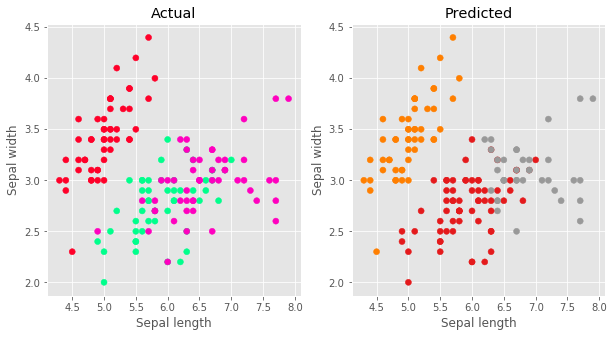

In [85]:
(fig, ax) = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(hc_result.iloc[:, 0], hc_result.iloc[:, 1], c=hc_result["target"], cmap='gist_rainbow')
ax[1].scatter(hc_result.iloc[:, 0], hc_result.iloc[:, 1], c=hc_result["y_pred"], cmap='Set1')

ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Sepal width')

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## PCA + HC 

In [86]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=3)

In [87]:
hc_cluster.fit(df) 

AgglomerativeClustering(n_clusters=3)

In [88]:
hc_y_pred = hc_cluster.fit_predict(df)

In [89]:
hc_result = pd.concat([df, y, pd.DataFrame(hc_y_pred, columns=["y_pred"])], axis = 1)
hc_result

,PC1,PC2,target,y_pred
0,-2.684126,0.319397,0,1
1,-2.714142,-0.177001,0,1
2,-2.888991,-0.144949,0,1
3,-2.745343,-0.318299,0,1
4,-2.728717,0.326755,0,1
...,...,...,...,...
145,1.944110,0.187532,2,2
146,1.527167,-0.375317,2,0
147,1.764346,0.078859,2,2
148,1.900942,0.116628,2,2


Text(0.5, 1.0, 'Predicted')

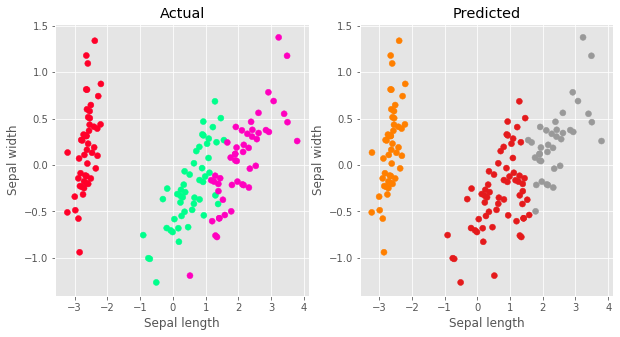

In [90]:
(fig, ax) = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(hc_result.iloc[:, 0], hc_result.iloc[:, 1], c=hc_result["target"], cmap='gist_rainbow')
ax[1].scatter(hc_result.iloc[:, 0], hc_result.iloc[:, 1], c=hc_result["y_pred"], cmap='Set1')

ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Sepal width')

ax[0].set_title('Actual')
ax[1].set_title('Predicted')